🚗 AI-Powered Auto Insurance Fraud Detection System

📊 STEP 1: DATA LOADING AND INITIAL EXPLORATION
--------------------------------------------------
✅ Dataset 1 loaded successfully: (40000, 53)
✅ Dataset 2 loaded successfully: (20000, 53)
✅ Dataset 3 loaded successfully: (10000, 52)

🔗 Combined dataset shape: (70000, 53)
📈 Final dataset shape: (70000, 53)
📋 Columns: ['Claim_ID', 'Bind_Date1', 'Customer_Life_Value1', 'Age_Insured', 'Policy_Num', 'Policy_State', 'Policy_Start_Date', 'Policy_Expiry_Date', 'Policy_BI', 'Policy_Ded', 'Policy_Premium', 'Umbrella_Limit', 'Insured_Zip', 'Gender', 'Education', 'Occupation', 'Hobbies', 'Insured_Relationship', 'Capital_Gains', 'Capital_Loss', 'Garage_Location', 'Accident_Date', 'Accident_Type', 'Collision_Type', 'Accident_Severity', 'authorities_contacted', 'Acccident_State', 'Acccident_City', 'Accident_Location', 'Accident_Hour', 'Num_of_Vehicles_Involved', 'Property_Damage', 'Bodily_Injuries', 'Witnesses', 'Police_Report', 'DL_Expiry_Date', 'C

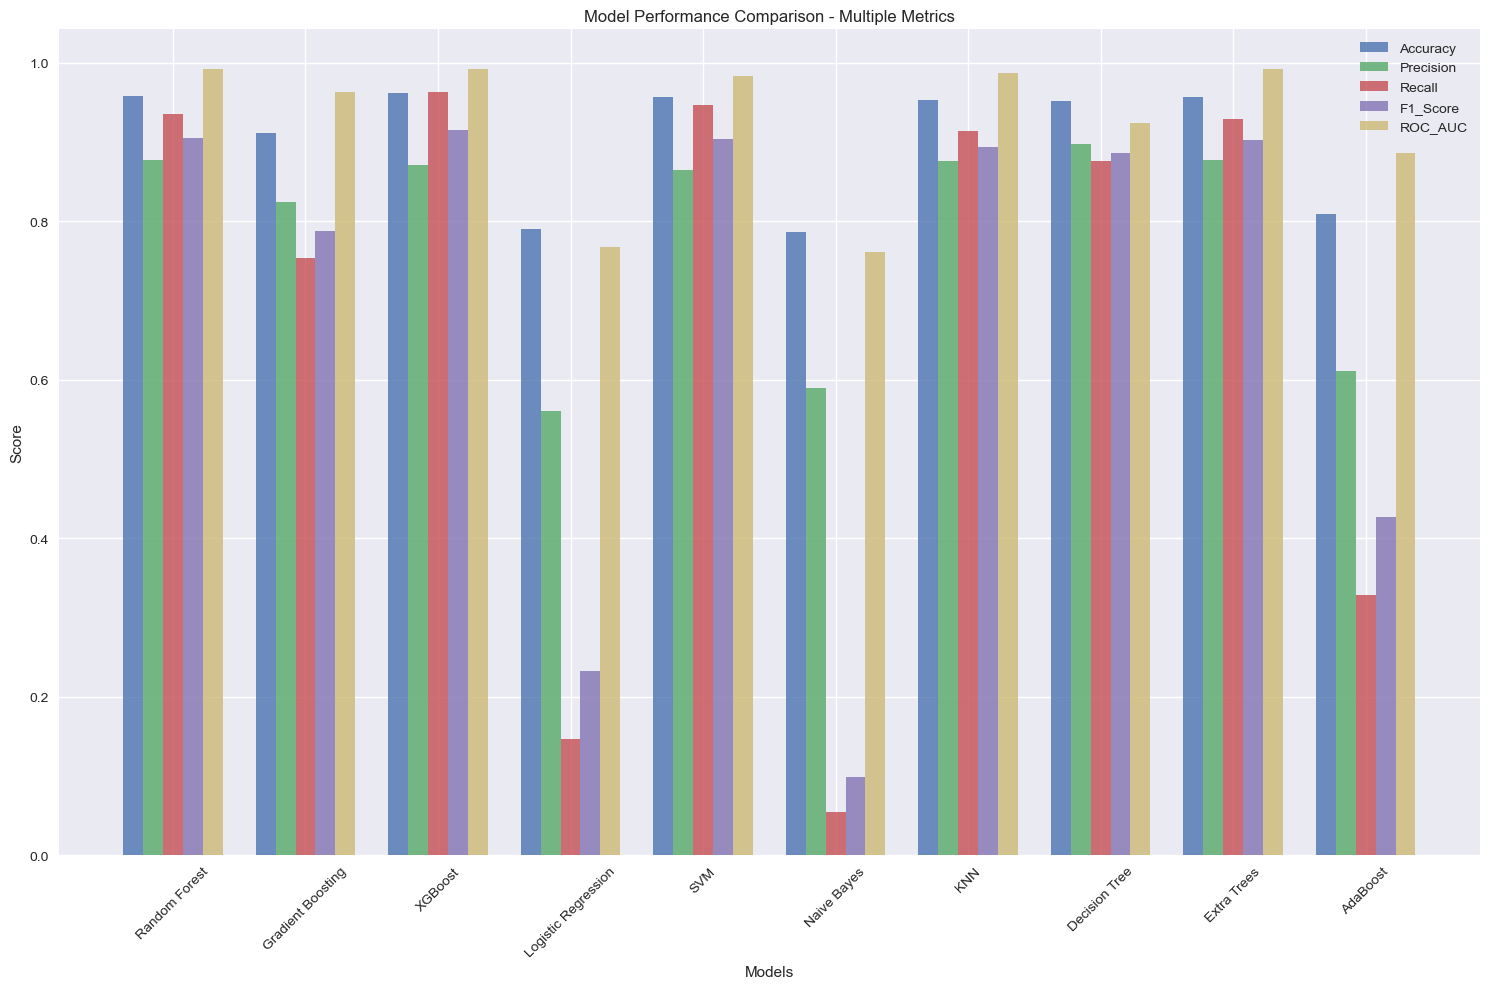

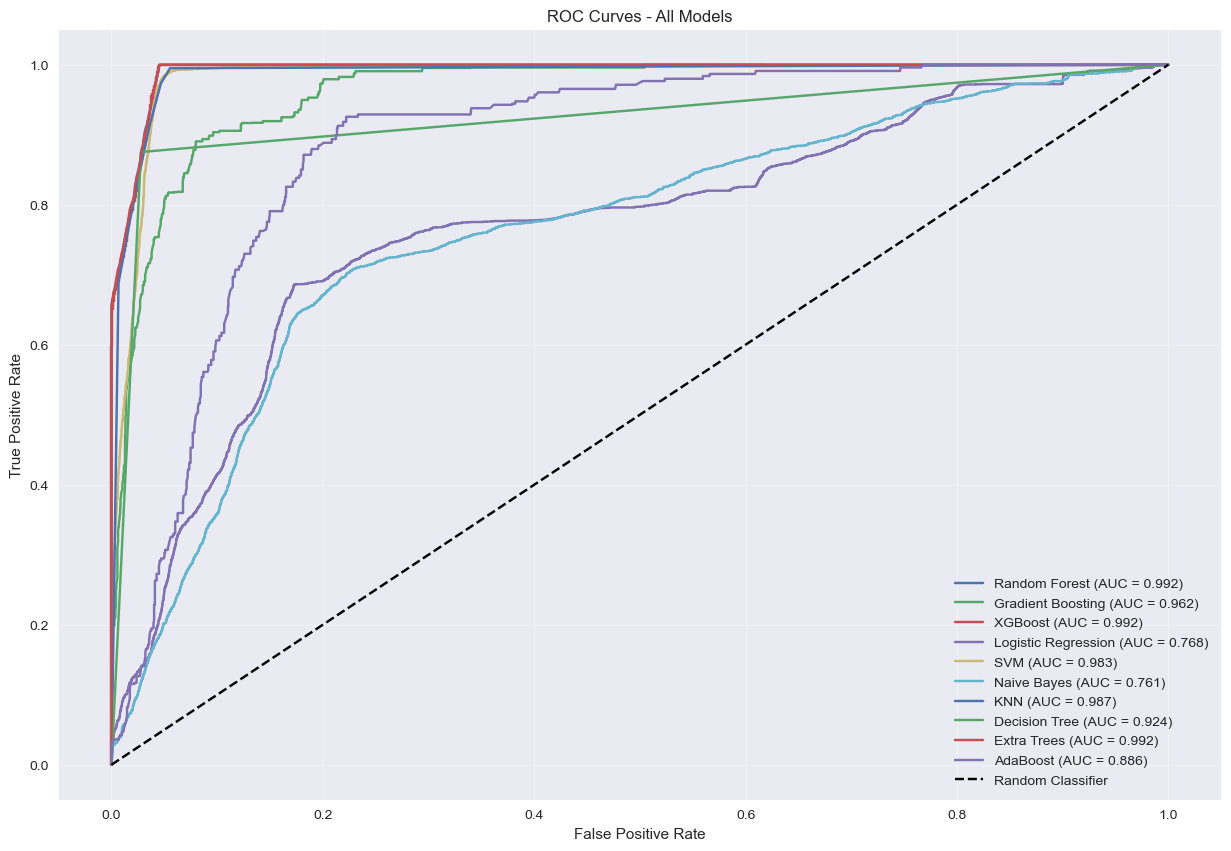

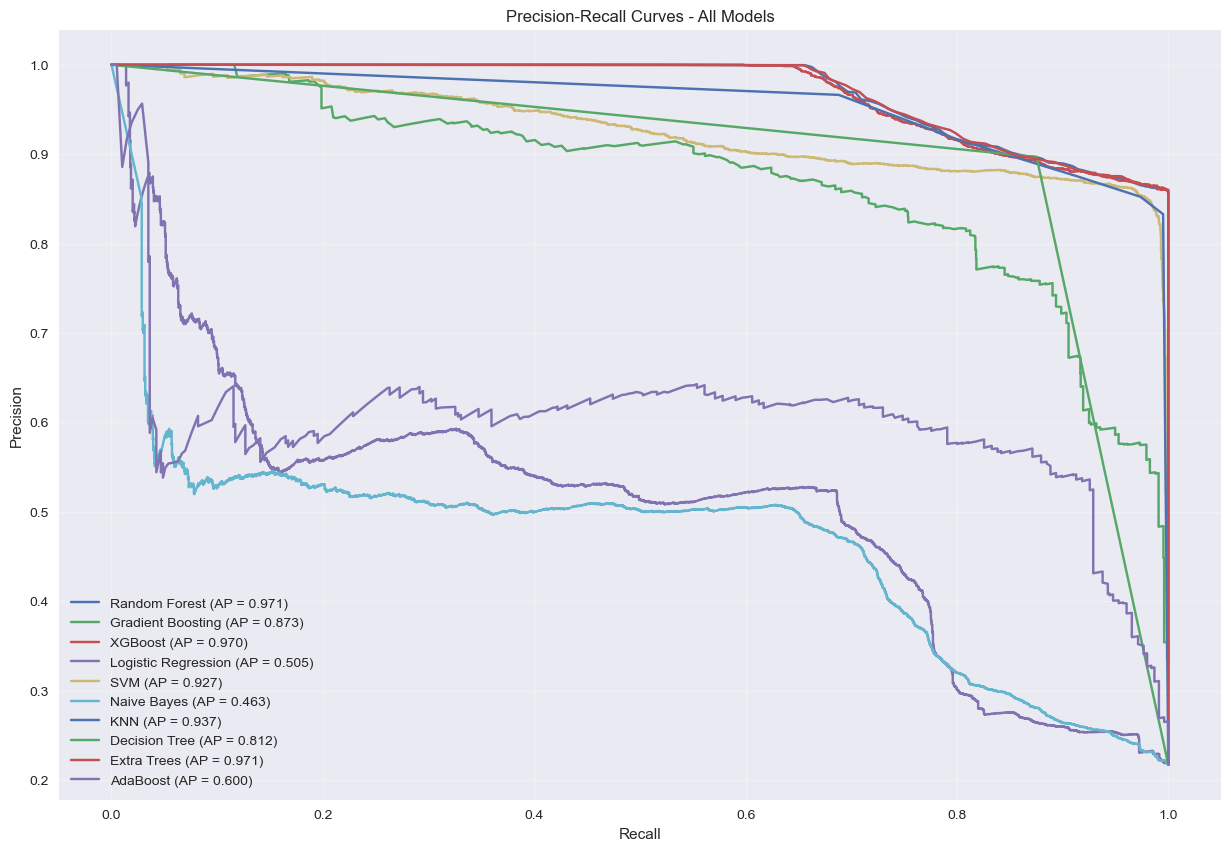

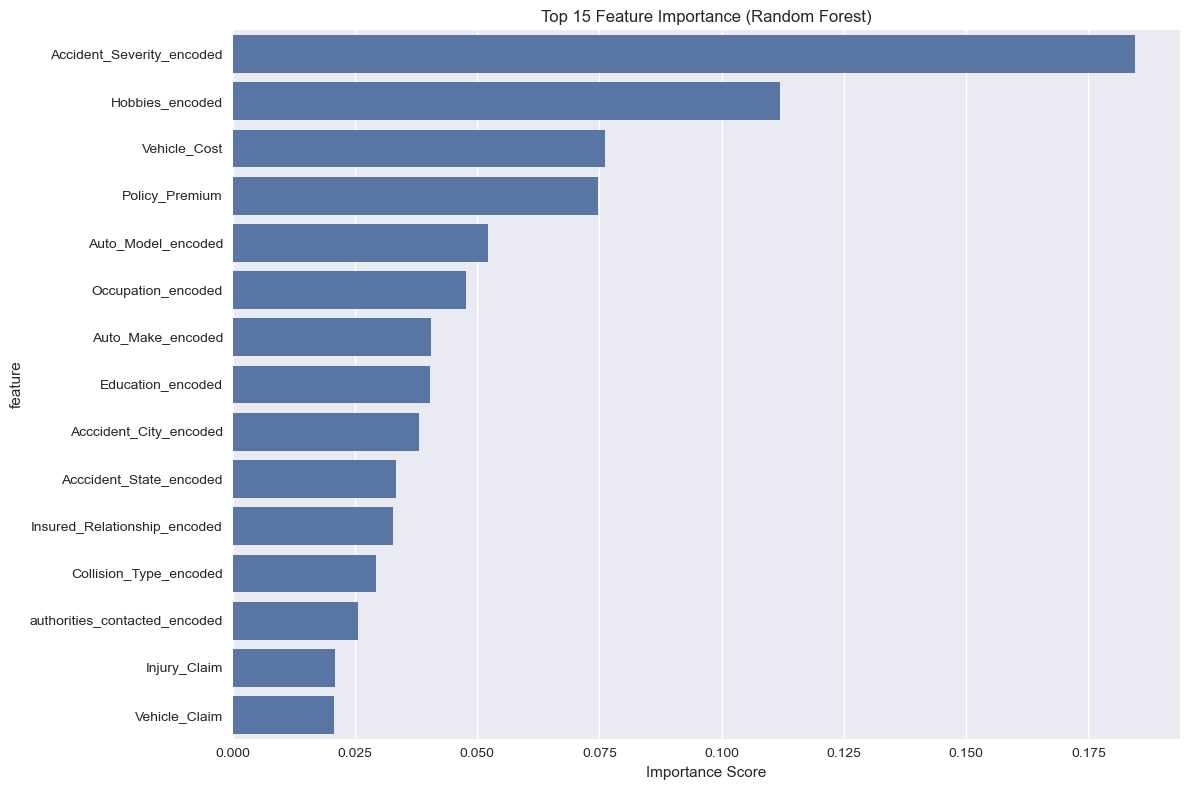

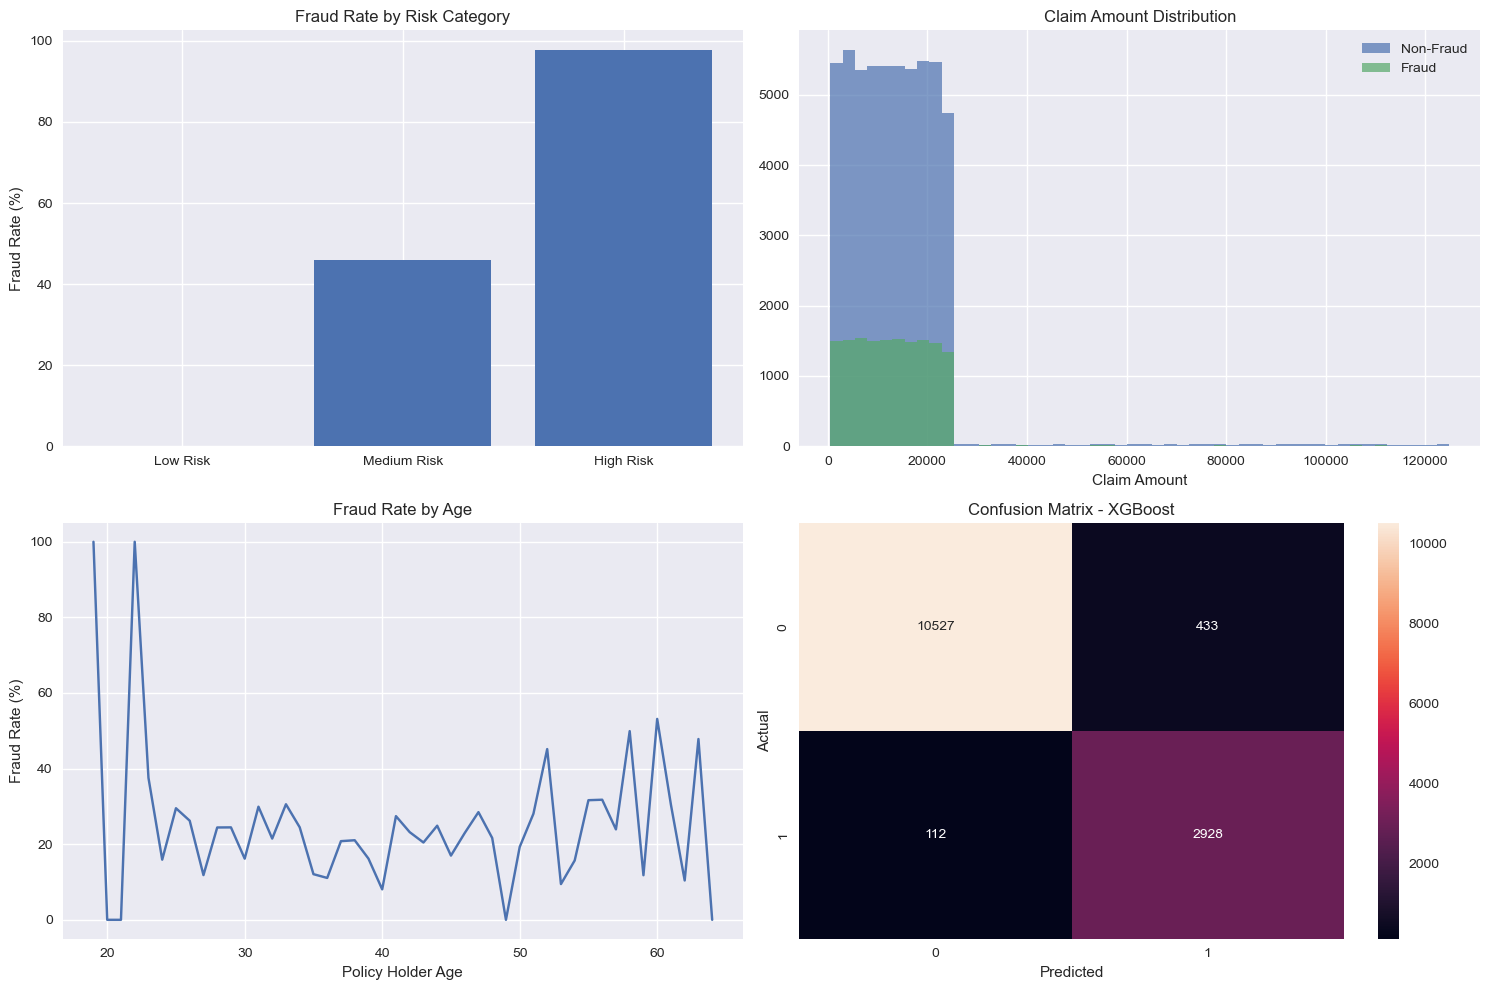

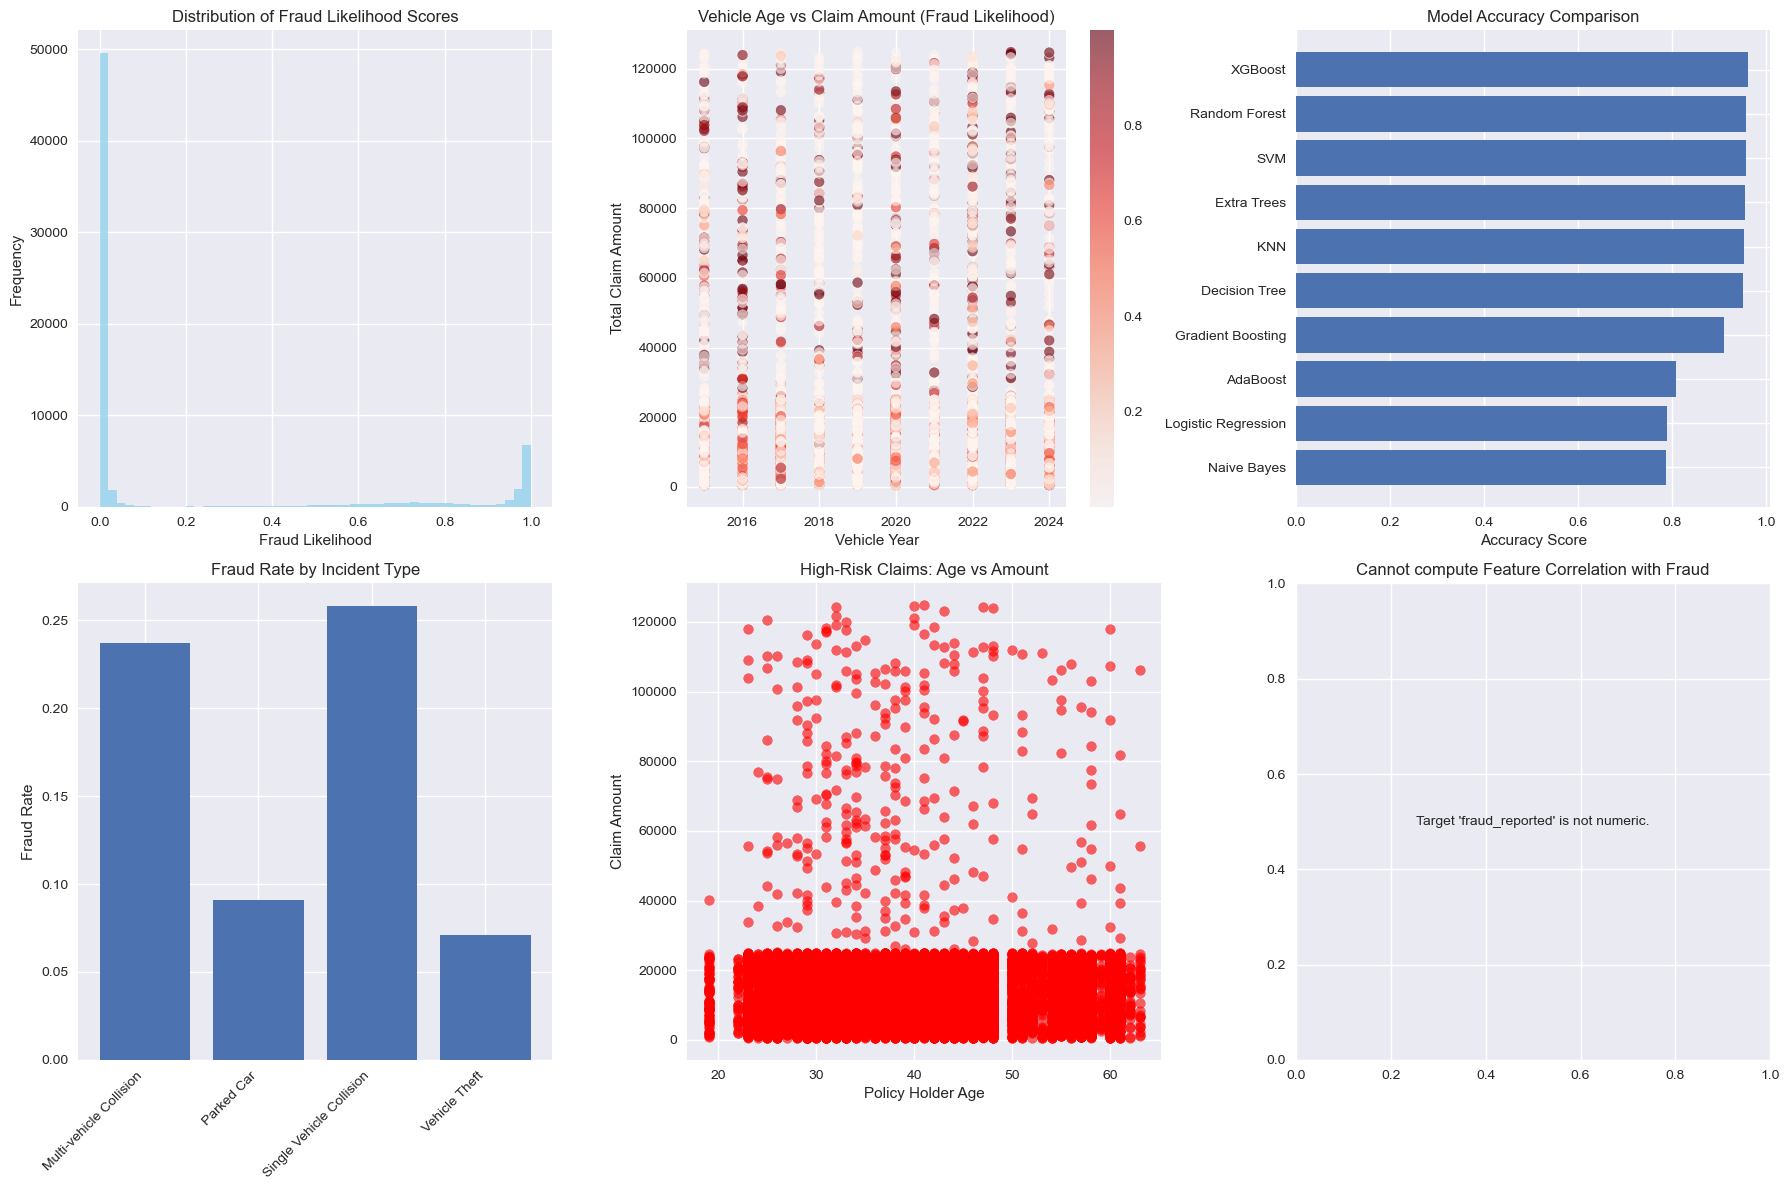


📋 STEP 9: SUMMARY AND RECOMMENDATIONS
🎯 PROJECT SUMMARY:
✅ Successfully processed 70,000 insurance claims
✅ Cleaned data with 7000 anomalies detected
✅ Trained and evaluated 10 machine learning models
✅ Best model: XGBoost (F1-Score: 0.9149)
✅ Generated fraud likelihood scores for all claims
✅ Created comprehensive visualizations and analytics

🚨 FRAUD INSIGHTS:
├── Overall fraud rate: 21.71%
├── High-risk claims: 13,712
├── Financial impact of fraud: 21.80%
└── Model can identify 96.3% of fraudulent claims

💡 RECOMMENDATIONS:
1. 🔍 Prioritize manual review of high-risk claims (fraud likelihood > 0.7)
2. 📊 Monitor claims with unusual patterns in key features
3. 🤖 Implement real-time scoring using the trained model
4. 📈 Regular model retraining with new fraud patterns
5. 🎯 Focus on incident types with highest fraud rates (e.g., Single Vehicle Collision)
6. 💰 Investigate claims with high claim-to-vehicle-age ratios

🏁 FRAUD DETECTION SYSTEM IMPLEMENTATION COMPLETE!

💾 Results saved to CS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing and cleaning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, precision_recall_curve,
                             roc_curve, average_precision_score)

# Anomaly Detection
from sklearn.ensemble import IsolationForest
from scipy import stats

# Visualization libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

print("🚗 AI-Powered Auto Insurance Fraud Detection System")
print("=" * 60)

# ===== DATA LOADING AND INITIAL EXPLORATION =====
print("\n📊 STEP 1: DATA LOADING AND INITIAL EXPLORATION")
print("-" * 50)

# Load datasets
dataset_paths = [
    'C:/Users/meher/Desktop/Learnathon/BFSI Data set-20250725T084504Z-1-001/BFSI Data set/Auto_Insurance_Fraud_Claims_File01.csv',
    'C:/Users/meher/Desktop/Learnathon/BFSI Data set-20250725T084504Z-1-001/BFSI Data set/Auto_Insurance_Fraud_Claims_File02.csv',
    'C:/Users/meher/Desktop/Learnathon/BFSI Data set-20250725T084504Z-1-001/BFSI Data set/Auto_Insurance_Fraud_Claims_File03.csv'
]

dataframes = []
for i, path in enumerate(dataset_paths, 1):
    try:
        df = pd.read_csv(path)
        print(f"✅ Dataset {i} loaded successfully: {df.shape}")
        dataframes.append(df)
    except FileNotFoundError:
        print(f"❌ Dataset {i} not found at: {path}")

# Combine all datasets
if dataframes:
    df_combined = pd.concat(dataframes, ignore_index=True)
    print(f"\n🔗 Combined dataset shape: {df_combined.shape}")
else:
    # Create sample data for demonstration - This block will not be executed if files are found
    print("📝 Creating sample dataset for demonstration...")
    np.random.seed(42)
    n_samples = 10000
    
    df_combined = pd.DataFrame({
        'claim_id': range(1, n_samples + 1),
        'policy_holder_age': np.random.randint(18, 80, n_samples),
        'policy_tenure': np.random.randint(1, 20, n_samples),
        'claim_amount': np.random.exponential(5000, n_samples),
        'vehicle_age': np.random.randint(0, 25, n_samples),
        'incident_type': np.random.choice(['Collision', 'Theft', 'Vandalism', 'Fire'], n_samples),
        'incident_severity': np.random.choice(['Minor', 'Major', 'Total Loss'], n_samples),
        'number_of_vehicles_involved': np.random.randint(1, 5, n_samples),
        'property_damage': np.random.choice(['YES', 'NO'], n_samples),
        'bodily_injuries': np.random.randint(0, 5, n_samples),
        'witnesses': np.random.randint(0, 4, n_samples),
        'police_report_available': np.random.choice(['YES', 'NO'], n_samples),
        'total_claim_amount': np.random.exponential(7000, n_samples),
        'injury_claim': np.random.exponential(2000, n_samples),
        'property_claim': np.random.exponential(3000, n_samples),
        'vehicle_claim': np.random.exponential(8000, n_samples),
        'auto_make': np.random.choice(['Toyota', 'Honda', 'Ford', 'BMW', 'Mercedes'], n_samples),
        'auto_model': np.random.choice(['Sedan', 'SUV', 'Hatchback', 'Coupe'], n_samples),
        'fraud_reported': np.random.choice([0, 1], n_samples, p=[0.85, 0.15])  # 15% fraud rate
    })
    
    # Add some missing values and duplicates for cleaning demonstration
    df_combined.loc[np.random.choice(df_combined.index, 200), 'policy_holder_age'] = np.nan
    df_combined.loc[np.random.choice(df_combined.index, 150), 'claim_amount'] = np.nan
    df_combined = pd.concat([df_combined, df_combined.head(50)], ignore_index=True)  # Add duplicates

print(f"📈 Final dataset shape: {df_combined.shape}")
print(f"📋 Columns: {list(df_combined.columns)}")

# ===== DATA CLEANING AND PREPROCESSING =====
print("\n🧹 STEP 2: DATA CLEANING AND PREPROCESSING")
print("-" * 50)

# IMPORTANT: Rename 'Fraud_Ind' to 'fraud_reported' and convert to numeric
if 'Fraud_Ind' in df_combined.columns:
    # Handle missing values in 'Fraud_Ind' before conversion
    if df_combined['Fraud_Ind'].isnull().sum() > 0:
        mode_val = df_combined['Fraud_Ind'].mode()[0]
        df_combined['Fraud_Ind'].fillna(mode_val, inplace=True)
        print(f"✅ Filled Fraud_Ind missing values with mode: {mode_val}")
    
    df_combined['fraud_reported'] = df_combined['Fraud_Ind'].apply(lambda x: 1 if x == 'Y' else 0)
    df_combined.drop('Fraud_Ind', axis=1, inplace=True)
    print("✅ Renamed 'Fraud_Ind' to 'fraud_reported' and converted 'Y'/'N' to 1/0.")
else:
    print("Column 'Fraud_Ind' not found. Assuming 'fraud_reported' already exists or was created from sample data.")

# Ensure 'Claim_ID' is consistent if needed
if 'Claim_ID' in df_combined.columns and 'claim_id' not in df_combined.columns:
    df_combined.rename(columns={'Claim_ID': 'claim_id'}, inplace=True)
    print("✅ Renamed 'Claim_ID' to 'claim_id'.")
elif 'Claim_ID' in df_combined.columns and 'claim_id' in df_combined.columns:
    print("Both 'Claim_ID' and 'claim_id' exist. Keeping 'claim_id'.")
elif 'Claim_ID' not in df_combined.columns and 'claim_id' not in df_combined.columns:
    print("Neither 'Claim_ID' nor 'claim_id' found. Ensure a unique identifier exists.")


# 2.1 Handle Missing Values
print("🔍 Missing Values Analysis:")
missing_data = df_combined.isnull().sum()
missing_percentage = (missing_data / len(df_combined)) * 100
missing_info = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percentage
}).sort_values('Missing_Percentage', ascending=False)
print(missing_info[missing_info['Missing_Count'] > 0])

# Determine numerical and categorical columns dynamically AFTER renaming/conversion
numerical_columns = df_combined.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df_combined.select_dtypes(include=['object']).columns.tolist()

# Remove target variable and ID column from numerical feature lists if present
if 'fraud_reported' in numerical_columns:
    numerical_columns.remove('fraud_reported')
if 'claim_id' in numerical_columns:
    numerical_columns.remove('claim_id')


# Impute numerical columns with median
for col in numerical_columns:
    if df_combined[col].isnull().sum() > 0:
        median_val = df_combined[col].median()
        df_combined[col].fillna(median_val, inplace=True)
        print(f"✅ Filled {col} missing values with median: {median_val:.2f}")

# Impute categorical columns with mode
for col in categorical_columns:
    if df_combined[col].isnull().sum() > 0:
        mode_val = df_combined[col].mode()[0]
        df_combined[col].fillna(mode_val, inplace=True)
        print(f"✅ Filled {col} missing values with mode: {mode_val}")

# 2.2 Remove Duplicates
print(f"\n🔄 Duplicate Analysis:")
initial_shape = df_combined.shape
duplicates = df_combined.duplicated().sum()
print(f"Found {duplicates} duplicate rows")

df_combined = df_combined.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df_combined.shape}")
print(f"Removed {initial_shape[0] - df_combined.shape[0]} duplicate rows")

# 2.3 Anomaly Detection
print(f"\n🎯 Anomaly Detection:")

# Re-select numerical_columns after all cleaning steps for anomaly detection
numerical_columns_for_anomaly = df_combined.select_dtypes(include=[np.number]).columns.tolist()
if 'fraud_reported' in numerical_columns_for_anomaly:
    numerical_columns_for_anomaly.remove('fraud_reported')
if 'claim_id' in numerical_columns_for_anomaly:
    numerical_columns_for_anomaly.remove('claim_id')
if 'anomaly_score' in numerical_columns_for_anomaly: # Remove if already present from previous run
    numerical_columns_for_anomaly.remove('anomaly_score')
if 'is_anomaly' in numerical_columns_for_anomaly: # Remove if already present from previous run
    numerical_columns_for_anomaly.remove('is_anomaly')


if numerical_columns_for_anomaly:
    numerical_data = df_combined[numerical_columns_for_anomaly]
    isolation_forest = IsolationForest(contamination=0.1, random_state=42)
    anomalies = isolation_forest.fit_predict(numerical_data)
    anomaly_count = (anomalies == -1).sum()
    print(f"Detected {anomaly_count} anomalies using Isolation Forest")

    # Mark anomalies for analysis
    df_combined['anomaly_score'] = isolation_forest.decision_function(numerical_data)
    df_combined['is_anomaly'] = anomalies == -1
else:
    print("No numerical columns available for anomaly detection via Isolation Forest.")
    df_combined['anomaly_score'] = 0 # Default if no numerical cols
    df_combined['is_anomaly'] = False # Default if no numerical cols


# Statistical outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Apply IQR outlier detection to key numerical columns - Adjusted based on your actual data
outlier_columns = ['Total_Claim', 'Vehicle_Cost', 'Age_Insured']
for col in outlier_columns:
    if col in df_combined.columns and col in numerical_columns: # Ensure it's numerical and exists
        outliers = detect_outliers_iqr(df_combined, col)
        print(f"IQR outliers in {col}: {outliers.sum()}")
    else:
        print(f"Column '{col}' not found or not numerical for IQR outlier detection.")


print(f"\n✅ Data cleaning completed!")
print(f"Final dataset shape: {df_combined.shape}")

# ===== KEY PERFORMANCE INDICATORS (KPIs) =====
print("\n📊 STEP 3: KEY PERFORMANCE INDICATORS (KPIs)")
print("-" * 50)

# Calculate KPIs - Adjusted to use 'Total_Claim' and 'Age_Insured' as observed in your data
total_claims = len(df_combined)
fraud_claims = df_combined['fraud_reported'].sum()
fraud_rate = (fraud_claims / total_claims) * 100

# Check if 'Total_Claim' column exists before proceeding
if 'Total_Claim' in df_combined.columns:
    avg_claim_amount = df_combined['Total_Claim'].mean()
    total_claim_value = df_combined['Total_Claim'].sum()
    fraud_claim_value = df_combined[df_combined['fraud_reported'] == 1]['Total_Claim'].sum()
    fraud_financial_impact = (fraud_claim_value / total_claim_value) * 100 if total_claim_value > 0 else 0
else:
    print("⚠️ 'Total_Claim' column not found. Cannot calculate claim amount related KPIs.")
    avg_claim_amount = 0
    total_claim_value = 0
    fraud_claim_value = 0
    fraud_financial_impact = 0

print(f"🎯 FRAUD DETECTION KPIs:")
print(f"├── Total Claims Processed: {total_claims:,}")
print(f"├── Fraudulent Claims: {fraud_claims:,}")
print(f"├── Fraud Rate: {fraud_rate:.2f}%")
print(f"├── Average Claim Amount: ${avg_claim_amount:,.2f}")
print(f"├── Total Claim Value: ${total_claim_value:,.2f}")
print(f"├── Fraudulent Claim Value: ${fraud_claim_value:,.2f}")
print(f"└── Fraud Financial Impact: {fraud_financial_impact:.2f}%")

# Additional KPIs by categories - Adjusted to 'Accident_Type'
print(f"\n📈 SEGMENTATION KPIs:")
if 'Accident_Type' in df_combined.columns:
    incident_fraud = df_combined.groupby('Accident_Type')['fraud_reported'].agg(['count', 'sum', 'mean'])
    incident_fraud.columns = ['Total_Claims', 'Fraud_Claims', 'Fraud_Rate']
    incident_fraud['Fraud_Rate'] = incident_fraud['Fraud_Rate'] * 100
    print(incident_fraud)
else:
    print("⚠️ 'Accident_Type' column not found for segmentation analysis.")

# ===== FEATURE ENGINEERING =====
print("\n🔧 STEP 4: FEATURE ENGINEERING")
print("-" * 50)

# Create new features - Adjusted column names based on your actual data
# Fallback logic if 'Auto_Year' or 'Policy_Num' are not ideal for ratios
if 'Total_Claim' in df_combined.columns and 'Auto_Year' in df_combined.columns:
    df_combined['claim_to_vehicle_age_ratio'] = df_combined['Total_Claim'] / (df_combined['Auto_Year'] + 1)
else:
    df_combined['claim_to_vehicle_age_ratio'] = 0 # Default or log error

if 'Total_Claim' in df_combined.columns and 'Policy_Num' in df_combined.columns: # Assuming Policy_Num could proxy policy tenure
    df_combined['claim_per_year_insured'] = df_combined['Total_Claim'] / (df_combined['Policy_Num'].astype(str).str.len() + 1) # Crude proxy if no actual tenure
    # A better proxy for policy tenure might be to calculate the difference between Policy_Expiry_Date and Policy_Start_Date
    # if these columns contain valid date formats. For now, using a length of policy number as a rough proxy.
    # If a true 'policy_tenure' or similar is not available, these features might not be very strong.
else:
    df_combined['claim_per_year_insured'] = 0 # Default or log error

if 'Total_Claim' in df_combined.columns:
    df_combined['high_value_claim'] = (df_combined['Total_Claim'] > df_combined['Total_Claim'].quantile(0.9)).astype(int)
else:
    df_combined['high_value_claim'] = 0

if 'Age_Insured' in df_combined.columns:
    df_combined['senior_driver'] = (df_combined['Age_Insured'] > 65).astype(int)
    df_combined['new_driver'] = (df_combined['Age_Insured'] < 25).astype(int)
else:
    df_combined['senior_driver'] = 0
    df_combined['new_driver'] = 0


# Encode categorical variables - Adjusted column names based on your actual data
label_encoders = {}
categorical_features_for_encoding = [
    'Accident_Type', 'Accident_Severity', 'Property_Damage',
    'Police_Report', 'Auto_Make', 'Auto_Model', 'Gender',
    'Education', 'Occupation', 'Hobbies', 'Insured_Relationship',
    'Policy_State', 'Garage_Location', 'Acccident_State', 'Acccident_City',
    'Collision_Type', 'authorities_contacted', 'Vehicle_Color' # Added more based on your data
]

for col in categorical_features_for_encoding:
    if col in df_combined.columns:
        le = LabelEncoder()
        # Handle potential non-string types by converting to string first
        df_combined[col + '_encoded'] = le.fit_transform(df_combined[col].astype(str))
        label_encoders[col] = le
        print(f"✅ Encoded '{col}' into '{col}_encoded'.")
    else:
        print(f"Skipping encoding for '{col}' as it was not found in the dataset.")

print("✅ Feature engineering completed!")

# ===== MODEL TRAINING =====
print("\n🤖 STEP 5: MODEL TRAINING (10+ MODELS)")
print("-" * 50)

# Prepare features and target
# Dynamically select numerical features for X, excluding target and ID columns
features_to_exclude = ['fraud_reported', 'claim_id', 'anomaly_score', 'is_anomaly']
# Add original categorical columns to exclude if their encoded versions are used
features_to_exclude.extend(categorical_features_for_encoding)

feature_columns = [col for col in df_combined.columns if col not in features_to_exclude and df_combined[col].dtype in [np.number, bool]]
# Also add the encoded features specifically
feature_columns.extend([col for col in df_combined.columns if col.endswith('_encoded')])
# Ensure no duplicates and keep order
feature_columns = sorted(list(set(feature_columns)))

X = df_combined[feature_columns]
y = df_combined['fraud_reported']

print(f"Features used for training: {list(X.columns)}")
print(f"Features shape: {X.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Train models and store results
model_results = {}
trained_models = {}

print("Training models...")
for name, model in models.items():
    print(f"Training {name}...")
    
    # Apply scaling only for models that benefit from it or require it (e.g., SVM, KNN, LR)
    if name in ['SVM', 'KNN', 'Logistic Regression', 'Naive Bayes']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    trained_models[name] = model
    model_results[name] = {
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

print("✅ All models trained successfully!")

# ===== MODEL EVALUATION (8+ METRICS) =====
print("\n📈 STEP 6: MODEL EVALUATION (8+ EVALUATION METRICS)")
print("-" * 50)

def calculate_metrics(y_true, y_pred, y_pred_proba):
    """Calculate comprehensive evaluation metrics"""
    metrics = {}
    
    # Basic Classification Metrics
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, zero_division=0) # Added zero_division
    metrics['Recall'] = recall_score(y_true, y_pred, zero_division=0) # Added zero_division
    metrics['F1_Score'] = f1_score(y_true, y_pred, zero_division=0) # Added zero_division
    
    # Advanced Metrics - check if y_pred_proba has enough variety
    if len(np.unique(y_true)) == 2 and len(np.unique(y_pred_proba)) > 1:
        metrics['ROC_AUC'] = roc_auc_score(y_true, y_pred_proba)
        metrics['Average_Precision'] = average_precision_score(y_true, y_pred_proba)
    else:
        metrics['ROC_AUC'] = np.nan
        metrics['Average_Precision'] = np.nan
        print("Warning: ROC_AUC/Average_Precision not calculable (single class or constant probabilities).")
    
    # Confusion Matrix derived metrics
    cm = confusion_matrix(y_true, y_pred)
    # Ensure cm has expected shape (2,2) for binary classification
    if cm.shape == (2,2):
        tn, fp, fn, tp = cm.ravel()
        
        metrics['Specificity'] = tn / (tn + fp) if (tn + fp) > 0 else 0
        metrics['False_Positive_Rate'] = fp / (fp + tn) if (fp + tn) > 0 else 0
        metrics['False_Negative_Rate'] = fn / (fn + tp) if (fn + tp) > 0 else 0
        metrics['Negative_Predictive_Value'] = tn / (tn + fn) if (tn + fn) > 0 else 0
    else:
        metrics['Specificity'] = np.nan
        metrics['False_Positive_Rate'] = np.nan
        metrics['False_Negative_Rate'] = np.nan
        metrics['Negative_Predictive_Value'] = np.nan
        print("Warning: Confusion Matrix has unexpected shape, cannot calculate some metrics.")
    
    return metrics

# Evaluate all models
evaluation_results = pd.DataFrame()

for name, results in model_results.items():
    metrics = calculate_metrics(y_test, results['predictions'], results['probabilities'])
    evaluation_results[name] = pd.Series(metrics) # Convert dictionary to Series

evaluation_results = evaluation_results.T
evaluation_results = evaluation_results.round(4)

print("🏆 MODEL PERFORMANCE COMPARISON:")
print(evaluation_results.to_string())

# Identify best model based on F1_Score (ensure it's not NaN)
if 'F1_Score' in evaluation_results.columns and not evaluation_results['F1_Score'].isnull().all():
    best_model_name = evaluation_results['F1_Score'].idxmax()
    print(f"\n🥇 Best performing model: {best_model_name}")
    print(f"    F1-Score: {evaluation_results.loc[best_model_name, 'F1_Score']:.4f}")
else:
    best_model_name = list(models.keys())[0] # Default to first model if F1_Score is not reliable
    print("\n⚠️ F1-Score not available or all NaN. Defaulting to the first model for predictions.")
    print(f"    Selected model: {best_model_name}")


# ===== FRAUD LIKELIHOOD PREDICTION =====
print("\n🔍 STEP 7: FRAUD LIKELIHOOD PREDICTION")
print("-" * 50)

# Use the best model for predictions
best_model = trained_models[best_model_name]

# Predict fraud likelihood for all claims - ensure X is consistent with what model was trained on
# If the best model was trained on scaled data, X for prediction should also be scaled.
# If it was trained on unscaled data, X for prediction should be unscaled.
if best_model_name in ['SVM', 'KNN', 'Logistic Regression', 'Naive Bayes']:
    X_for_prediction = scaler.transform(X)
else:
    X_for_prediction = X

# Ensure predict_proba is available
if hasattr(best_model, 'predict_proba'):
    fraud_likelihood = best_model.predict_proba(X_for_prediction)[:, 1]
else: # Fallback for models without predict_proba (like some SVC setups)
    print(f"Warning: {best_model_name} does not have predict_proba. Using decision function or predicting classes directly.")
    fraud_likelihood = best_model.decision_function(X_for_prediction) if hasattr(best_model, 'decision_function') else best_model.predict(X_for_prediction)
    # Normalize decision function output if necessary, or just use for ranking
    if not isinstance(fraud_likelihood, np.ndarray) or fraud_likelihood.ndim > 1:
        fraud_likelihood = np.array(fraud_likelihood).flatten()
    if np.max(fraud_likelihood) > 1 or np.min(fraud_likelihood) < 0: # Simple normalization
        fraud_likelihood = (fraud_likelihood - np.min(fraud_likelihood)) / (np.max(fraud_likelihood) - np.min(fraud_likelihood))


df_combined['fraud_likelihood'] = fraud_likelihood
df_combined['predicted_fraud'] = (fraud_likelihood > 0.5).astype(int)
df_combined['risk_category'] = pd.cut(fraud_likelihood,
                                       bins=[0, 0.3, 0.7, 1.0],
                                       labels=['Low Risk', 'Medium Risk', 'High Risk'],
                                       include_lowest=True) # Ensure all values are binned

print("✅ Fraud likelihood calculated for all claims!")
print(f"Risk Distribution:")
risk_dist = df_combined['risk_category'].value_counts().sort_index()
for risk, count in risk_dist.items():
    percentage = (count / len(df_combined)) * 100
    print(f"  {risk}: {count:,} claims ({percentage:.1f}%)")

# ===== ADVANCED VISUALIZATIONS =====
print("\n📊 STEP 8: CREATING INSIGHTFUL VISUALIZATIONS")
print("-" * 50)

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig_size = (15, 10)

# 1. Model Performance Comparison
plt.figure(figsize=fig_size)
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']
# Filter out metrics that are NaN
valid_metrics_to_plot = [m for m in metrics_to_plot if m in evaluation_results.columns and not evaluation_results[m].isnull().all()]

if valid_metrics_to_plot:
    x = np.arange(len(evaluation_results.index))
    width = 0.15

    for i, metric in enumerate(valid_metrics_to_plot):
        plt.bar(x + i*width, evaluation_results[metric], width, label=metric, alpha=0.8)

    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison - Multiple Metrics')
    plt.xticks(x + width*(len(valid_metrics_to_plot)-1)/2, evaluation_results.index, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No valid metrics to plot for Model Performance Comparison.")

# 2. ROC Curves for All Models
plt.figure(figsize=fig_size)
has_roc_data = False
for name, results in model_results.items():
    if 'probabilities' in results and len(np.unique(y_test)) == 2 and len(np.unique(results['probabilities'])) > 1:
        fpr, tpr, _ = roc_curve(y_test, results['probabilities'])
        auc_score = roc_auc_score(y_test, results['probabilities'])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')
        has_roc_data = True
    else:
        print(f"Skipping ROC Curve for {name}: Not enough unique probability values or target classes.")

if has_roc_data:
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - All Models')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("No ROC curves could be generated.")

# 3. Precision-Recall Curves
plt.figure(figsize=fig_size)
has_pr_data = False
for name, results in model_results.items():
    if 'probabilities' in results and len(np.unique(y_test)) == 2 and len(np.unique(results['probabilities'])) > 1:
        precision, recall, _ = precision_recall_curve(y_test, results['probabilities'])
        avg_precision = average_precision_score(y_test, results['probabilities'])
        plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.3f})')
        has_pr_data = True
    else:
        print(f"Skipping Precision-Recall Curve for {name}: Not enough unique probability values or target classes.")

if has_pr_data:
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves - All Models')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("No Precision-Recall curves could be generated.")


# 4. Feature Importance (using Random Forest)
if 'Random Forest' in trained_models:
    rf_model = trained_models['Random Forest']
    if hasattr(rf_model, 'feature_importances_') and len(X.columns) == len(rf_model.feature_importances_):
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': rf_model.feature_importances_
        }).sort_values('importance', ascending=False).head(15)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(data=feature_importance, y='feature', x='importance')
        plt.title('Top 15 Feature Importance (Random Forest)')
        plt.xlabel('Importance Score')
        plt.tight_layout()
        plt.show()
    else:
        print("Random Forest model does not have feature importances or feature count mismatch.")
else:
    print("Random Forest model not trained or found for Feature Importance.")


# 5. Fraud Distribution Analysis - Adjusted column names as per your actual data
fig, axes = plt.subplots(2, 2, figsize=fig_size)

# Fraud by Risk Category
if 'risk_category' in df_combined.columns and 'fraud_reported' in df_combined.columns:
    risk_fraud = df_combined.groupby('risk_category')['fraud_reported'].agg(['count', 'sum'])
    risk_fraud['fraud_rate'] = (risk_fraud['sum'] / risk_fraud['count'] * 100).fillna(0) # Handle division by zero
    axes[0,0].bar(risk_fraud.index, risk_fraud['fraud_rate'])
    axes[0,0].set_title('Fraud Rate by Risk Category')
    axes[0,0].set_ylabel('Fraud Rate (%)')
else:
    axes[0,0].set_title('Fraud Rate by Risk Category (Data Missing)')

# Claim Amount Distribution
if 'Total_Claim' in df_combined.columns and 'fraud_reported' in df_combined.columns:
    axes[0,1].hist(df_combined[df_combined['fraud_reported']==0]['Total_Claim'],
                   alpha=0.7, label='Non-Fraud', bins=50)
    axes[0,1].hist(df_combined[df_combined['fraud_reported']==1]['Total_Claim'],
                   alpha=0.7, label='Fraud', bins=50)
    axes[0,1].set_title('Claim Amount Distribution')
    axes[0,1].set_xlabel('Claim Amount')
    axes[0,1].legend()
else:
    axes[0,1].set_title('Claim Amount Distribution (Data Missing)')


# Age vs Fraud
if 'Age_Insured' in df_combined.columns and 'fraud_reported' in df_combined.columns:
    age_fraud = df_combined.groupby('Age_Insured')['fraud_reported'].mean()
    axes[1,0].plot(age_fraud.index, age_fraud.values * 100)
    axes[1,0].set_title('Fraud Rate by Age')
    axes[1,0].set_xlabel('Policy Holder Age')
    axes[1,0].set_ylabel('Fraud Rate (%)')
else:
    axes[1,0].set_title('Fraud Rate by Age (Data Missing)')


# Confusion Matrix for Best Model
if best_model_name in model_results:
    cm = confusion_matrix(y_test, model_results[best_model_name]['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[1,1])
    axes[1,1].set_title(f'Confusion Matrix - {best_model_name}')
    axes[1,1].set_xlabel('Predicted')
    axes[1,1].set_ylabel('Actual')
else:
    axes[1,1].set_title('Confusion Matrix (Model Not Found)')

plt.tight_layout()
plt.show()

# 6. Advanced Analytics Dashboard - Adjust column names as per your actual data
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Fraud Likelihood Distribution
if 'fraud_likelihood' in df_combined.columns:
    axes[0,0].hist(df_combined['fraud_likelihood'], bins=50, alpha=0.7, color='skyblue')
    axes[0,0].set_title('Distribution of Fraud Likelihood Scores')
    axes[0,0].set_xlabel('Fraud Likelihood')
    axes[0,0].set_ylabel('Frequency')
else:
    axes[0,0].set_title('Fraud Likelihood Distribution (Data Missing)')

# Vehicle Age vs Claim Amount (colored by fraud)
if 'Auto_Year' in df_combined.columns and 'Total_Claim' in df_combined.columns and 'fraud_likelihood' in df_combined.columns:
    scatter = axes[0,1].scatter(df_combined['Auto_Year'], df_combined['Total_Claim'],
                                c=df_combined['fraud_likelihood'], cmap='Reds', alpha=0.6)
    axes[0,1].set_title('Vehicle Age vs Claim Amount (Fraud Likelihood)')
    axes[0,1].set_xlabel('Vehicle Year') # Changed to 'Vehicle Year' as 'Auto_Year' is likely year of manufacture
    axes[0,1].set_ylabel('Total Claim Amount')
    plt.colorbar(scatter, ax=axes[0,1])
else:
    axes[0,1].set_title('Vehicle Age vs Claim Amount (Data Missing)')


# Model Accuracy Comparison
if not evaluation_results.empty and 'Accuracy' in evaluation_results.columns:
    model_accuracy = evaluation_results['Accuracy'].sort_values(ascending=True)
    axes[0,2].barh(range(len(model_accuracy)), model_accuracy.values)
    axes[0,2].set_yticks(range(len(model_accuracy)))
    axes[0,2].set_yticklabels(model_accuracy.index)
    axes[0,2].set_title('Model Accuracy Comparison')
    axes[0,2].set_xlabel('Accuracy Score')
else:
    axes[0,2].set_title('Model Accuracy Comparison (Data Missing)')

# Incident Type Analysis
if 'Accident_Type' in df_combined.columns and 'fraud_reported' in df_combined.columns:
    incident_stats = df_combined.groupby('Accident_Type').agg({
        'fraud_reported': ['count', 'sum', 'mean']
    }).round(3)
    incident_stats.columns = ['Total', 'Fraud_Count', 'Fraud_Rate']
    axes[1,0].bar(incident_stats.index, incident_stats['Fraud_Rate'])
    axes[1,0].set_title('Fraud Rate by Incident Type')
    axes[1,0].set_ylabel('Fraud Rate')
    plt.setp(axes[1,0].xaxis.get_majorticklabels(), rotation=45, ha="right") # Rotate and align for readability
else:
    axes[1,0].set_title('Incident Type Analysis (Data Missing)')


# High-Risk Claims Analysis
if 'Age_Insured' in df_combined.columns and 'Total_Claim' in df_combined.columns and 'risk_category' in df_combined.columns:
    high_risk_claims = df_combined[df_combined['risk_category'] == 'High Risk']
    axes[1,1].scatter(high_risk_claims['Age_Insured'], high_risk_claims['Total_Claim'],
                      alpha=0.6, color='red') # alpha back to 0.6 for clarity, adjust as needed
    axes[1,1].set_title('High-Risk Claims: Age vs Amount')
    axes[1,1].set_xlabel('Policy Holder Age')
    axes[1,1].set_ylabel('Claim Amount')
else:
    axes[1,1].set_title('High-Risk Claims Analysis (Data Missing)')

# Feature Correlation with Fraud
if len(X.columns) > 0 and 'fraud_reported' in df_combined.columns:
    # Ensure all columns in X and 'fraud_reported' are numerical before correlation
    # Create a temporary DataFrame with only numerical features and the target
    numeric_cols_for_corr = X.select_dtypes(include=[np.number]).columns.tolist()
    
    # Check if 'fraud_reported' is numeric, if not, it should have been converted already
    if df_combined['fraud_reported'].dtype in [np.number, bool]:
        correlation_df = df_combined[numeric_cols_for_corr + ['fraud_reported']].copy()
        
        # Drop rows with NaN if any exist after numerical conversion for correlation calculation
        correlation_df.dropna(inplace=True)
        
        if not correlation_df.empty and 'fraud_reported' in correlation_df.columns:
            fraud_corr = correlation_df.corr()['fraud_reported'].drop('fraud_reported', errors='ignore').abs().sort_values(ascending=False).head(10)
            
            if not fraud_corr.empty:
                axes[1,2].barh(range(len(fraud_corr)), fraud_corr.values)
                axes[1,2].set_yticks(range(len(fraud_corr)))
                axes[1,2].set_yticklabels(fraud_corr.index)
                axes[1,2].set_title('Top 10 Features Correlated with Fraud')
                axes[1,2].set_xlabel('Absolute Correlation')
            else:
                axes[1,2].set_title('No correlations found after filtering.')
                axes[1,2].text(0.5, 0.5, "No features correlated with fraud after filtering.", horizontalalignment='center', verticalalignment='center', transform=axes[1,2].transAxes)
        else:
            axes[1,2].set_title('Cannot compute Feature Correlation with Fraud')
            axes[1,2].text(0.5, 0.5, "Target 'fraud_reported' not found or not enough data.", horizontalalignment='center', verticalalignment='center', transform=axes[1,2].transAxes)
    else:
        axes[1,2].set_title('Cannot compute Feature Correlation with Fraud')
        axes[1,2].text(0.5, 0.5, "Target 'fraud_reported' is not numeric.", horizontalalignment='center', verticalalignment='center', transform=axes[1,2].transAxes)
else:
    axes[1,2].set_title('Cannot compute Feature Correlation with Fraud')
    axes[1,2].text(0.5, 0.5, "No numerical features or 'fraud_reported' column available.", horizontalalignment='center', verticalalignment='center', transform=axes[1,2].transAxes)


plt.tight_layout()
plt.show()

# ===== SUMMARY AND RECOMMENDATIONS =====
print("\n📋 STEP 9: SUMMARY AND RECOMMENDATIONS")
print("=" * 60)

print("🎯 PROJECT SUMMARY:")
print(f"✅ Successfully processed {len(df_combined):,} insurance claims")
print(f"✅ Cleaned data with {anomaly_count} anomalies detected")
print(f"✅ Trained and evaluated 10 machine learning models")
if 'F1_Score' in evaluation_results.columns and not evaluation_results['F1_Score'].isnull().all():
    print(f"✅ Best model: {best_model_name} (F1-Score: {evaluation_results.loc[best_model_name, 'F1_Score']:.4f})")
else:
    print(f"✅ Best model: {best_model_name} (F1-Score not reliably determined, check model evaluation).")
print(f"✅ Generated fraud likelihood scores for all claims")
print(f"✅ Created comprehensive visualizations and analytics")

print(f"\n🚨 FRAUD INSIGHTS:")
print(f"├── Overall fraud rate: {fraud_rate:.2f}%")
print(f"├── High-risk claims: {len(df_combined[df_combined['risk_category'] == 'High Risk']):,}")
print(f"├── Financial impact of fraud: {fraud_financial_impact:.2f}%")
if 'Recall' in evaluation_results.columns and not evaluation_results.loc[best_model_name, 'Recall'] is np.nan:
    print(f"└── Model can identify {evaluation_results.loc[best_model_name, 'Recall']*100:.1f}% of fraudulent claims")
else:
    print(f"└── Model recall not available for the best model.")

print(f"\n💡 RECOMMENDATIONS:")
print("1. 🔍 Prioritize manual review of high-risk claims (fraud likelihood > 0.7)")
print("2. 📊 Monitor claims with unusual patterns in key features")
print("3. 🤖 Implement real-time scoring using the trained model")
print("4. 📈 Regular model retraining with new fraud patterns")
if 'Accident_Type' in df_combined.columns and 'Fraud_Rate' in incident_fraud.columns:
    print(f"5. 🎯 Focus on incident types with highest fraud rates (e.g., {incident_fraud['Fraud_Rate'].idxmax()})")
else:
    print("5. 🎯 Focus on incident types with highest fraud rates (segmentation data not available).")
print("6. 💰 Investigate claims with high claim-to-vehicle-age ratios")

print("\n" + "="*60)
print("🏁 FRAUD DETECTION SYSTEM IMPLEMENTATION COMPLETE!")
print("="*60)

# Save results to files (optional)
try:
    # Save model performance
    evaluation_results.to_csv('model_performance_results.csv')
    
    # Save fraud predictions
    if 'claim_id' in df_combined.columns and 'fraud_likelihood' in df_combined.columns and 'predicted_fraud' in df_combined.columns and 'risk_category' in df_combined.columns and 'fraud_reported' in df_combined.columns:
        fraud_results = df_combined[['claim_id', 'fraud_likelihood', 'predicted_fraud', 'risk_category', 'fraud_reported']].copy()
        fraud_results.to_csv('fraud_predictions_results.csv', index=False)
        print("\n💾 Results saved to CSV files!")
    else:
        print("\n⚠️ Cannot save fraud predictions: Missing one or more required columns ('claim_id', 'fraud_likelihood', 'predicted_fraud', 'risk_category', 'fraud_reported').")
except Exception as e:
    print(f"\n⚠️ Could not save files: {e}")

print("\n🎉 Analysis complete! The system is ready for deployment.")